## How to Run a MCViNE beam simulation:

The first step in running a MCViNE simulation is performing a beam simulation.  This step involves simulating neutrons traveling down the beam line, interacting with various guides and neutron optics instruments, and the simulation finishes with the neutrons located just before the sample assembly.

### Step 1: Create Simulation Directory and Source MCViNE (SNS users)

In [12]:
# Define the directory where the beam simulation will run
# !! Change this!  Use a subdirectory of your own home directory
beamdir = "/SNS/users/p63/mcvine/beams/beam_20meV/"
!mkdir -p {beamdir}  

#this will create the beamdir directory so you should pick a directory name
# that doesn't already exist

In [13]:
%cd {beamdir}
!ls

/SNS/users/p63/mcvine/beams/beam_20meV


In [15]:
# This command will set up the python environment needed for MCViNE and will
# then set up MCViNE itself

!source ~lj7/.use-miniconda2
!source activate mcvine

discarding /SNS/users/lj7/software/miniconda2/envs/mcvine/bin from PATH
prepending /SNS/users/lj7/software/miniconda2/envs/mcvine/bin to PATH


In [5]:
# this command will list the possible instruments for the beam simulation
#!mcvine instruments

In [16]:
# this command will list the possible command for ARCS
!mcvine instruments arcs

/SNS/users/lj7/software/miniconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /SNS/users/lj7/software/miniconda2/envs/mcvine.
  warnings.warn(msg)
Usage: mcvine instruments arcs [OPTIONS] COMMAND [ARGS]...

Options:
  --help  Show this message and exit.

Commands:
  analyze_beam
  beam             beam simulation.
  events2nxs       convert events.dat (generated by...
  m2s              simplified moderator to sample simulation app
  mod2sample       moderator to sample simulation
  neutrons2events  convert scattereed neutrons to events...
  neutrons2nxs     convert scattereed neutrons to nexus file...
  nxs              nexus utils


In [17]:
# this command will provide help details for how to run a beam simulation on
# ARCS; NOTE: without the "-h" option, a real beam simulation will begin to
# run with the default values set

!mcvine instruments arcs beam -h

/SNS/users/lj7/software/miniconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /SNS/users/lj7/software/miniconda2/envs/mcvine.
  warnings.warn(msg)

Simulate ARCS beam.

It is a wrapper of arcs-m2s and a postprocessing step to
compute monitor spectra and others.

Example:

 $ arcs_beam --fermi_chopper=700-1.5-SMI --fermi_nu=600 --T0_nu=60 --E=600 --ncount=1e8

For more details of cmd line parameters, run:

 $ arcs_beam --help-properties

Impl notes:
* The postprocessing happens in mcvine.instruments.ARCS.beam_postprocessing.



In [10]:
# This command will provide more detail on the available parameters that can
# be modified for an ARCS beam simulation
!mcvine instruments arcs beam --help-properties

/SNS/users/lj7/software/miniconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /SNS/users/lj7/software/miniconda2/envs/mcvine.
  warnings.warn(msg)
properties of 'arcs_beam':
    E=<float>: desired incident beam energy. unit: meV
        default value: 70
        current value: 70.0, from {default}
    T0_nu=<float>: Spinning frequency of T0 chopper
        default value: 60
        current value: 60.0, from {default}
    dumpconfiguration=<bool>: If set, dump configuration to a pml file
        default value: 0
        current value: False, from {default}
    dumpconfiguration-output=<str>: Output file path of dumped configuration file (pml)
        default value: ''
        current value: '', from {default}
    emission_time=<float>: emission time for moderator unit (microsecond)
        default value: -1
        current value: -1.0, from {default}
    fermi_ch

I will now show you an example beam simulation where I use the following parameters:

incident neutron energy = 20 meV

T0 chopper speed = 90 Hz

Fermi chopper speed = 300 Hz

number of neutrons = 1e6

In [18]:
!mcvine instruments arcs beam --E=20.0 --T0_nu=90 --fermi_nu=300 --ncount=1e6

/SNS/users/lj7/software/miniconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /SNS/users/lj7/software/miniconda2/envs/mcvine.
  warnings.warn(msg)
Generating pml for arcs beam instrument...
 -> running mcvine instruments arcs m2s --with_moderator_angling=True --E=20.0 --T0_nu=90.0 --emission_time=-1.0 --fermi_nu=300.0 --fermi_chopper=100-1.5-SMI --- -dump-pml=yes -h...
moderator emission time for neutron of energy 20.0 is 1.12602367893e-06
moderator emission time for neutron of energy 20.0 is 1.12602367893e-06
/SNS/users/lj7/software/miniconda2/envs/mcvine/lib/python2.7/site-packages/mcni/pyre_support/MpiApplication.py:87: UserWarning: no point to run in parallel mode when using just one node
  warnings.warn("no point to run in parallel mode when using just one node")
------------------------------------------------------------
* Instrument simulation applicatio

In [19]:
# Look at Output files
!ls

arcs_moderator2sample.pml		     mon1-tof.dat
_m2sout					     mon2-tof.dat
mcvine-instruments-arcs-analyze_beam.params  out
mcvine-instruments-arcs-beam.params	     README.arcs_beam
mcvine-instruments-arcs-m2s.params	     run-m2s.sh
mcvine-instruments-arcs-mod2sample.params


In [21]:
!ls out

ienergy.h5  ix_divy.h5	iy_divy.h5	      neutrons
itof.h5     ix_y.h5	mon1-itof-focused.h5  props.json
ix_divx.h5  iy_divx.h5	mon2-itof-focused.h5  rank0-step0


<IPython.core.display.Javascript object>


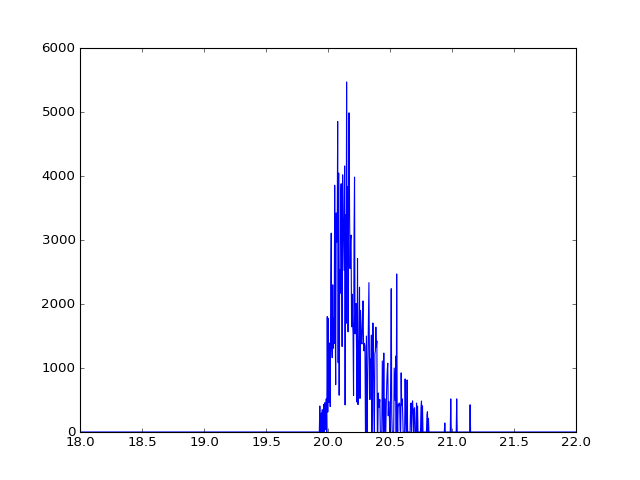

In [24]:
# Let's plot the I(E) spectrum now:
%matplotlib notebook
from matplotlib import pyplot as plt
import histogram.hdf as hh, histogram as H

ie = hh.load("out/ienergy.h5")
plt.plot(ie.energy, ie.I)

That's it!  We have completed a successful beam simulation which we can now use in future scattering simulations.